# 신경망 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## 다차원 배열 계산

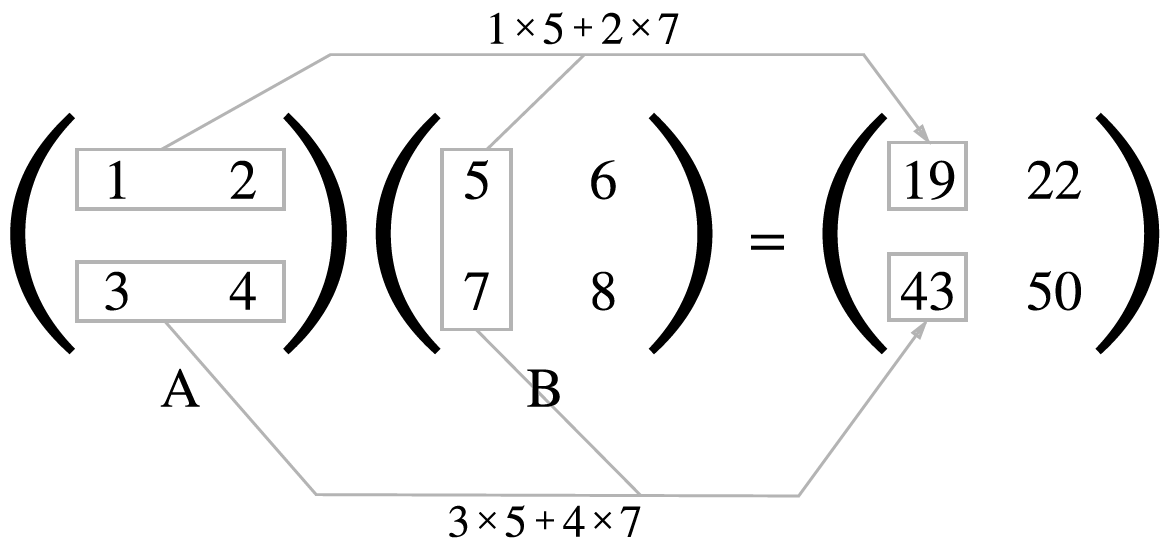

In [2]:
from IPython.display import Image
Image('./deep_learning_images/fig 3-11.png', width=400)

In [3]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

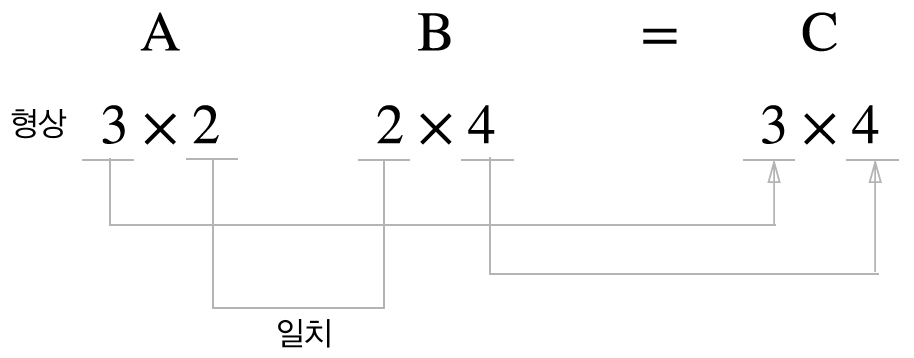

In [4]:
Image('./deep_learning_images/fig 3-12.png', width=400)

In [5]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8, 9, 10], [11, 12, 13, 14]])
C = np.dot(A, B)
print(A.shape, B.shape, C.shape)

(3, 2) (2, 4) (3, 4)


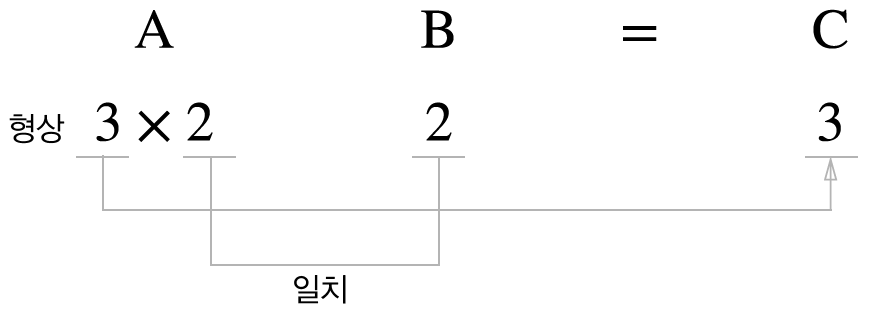

In [6]:
Image('./deep_learning_images/fig 3-13.png', width=400)

In [7]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
C = np.dot(A, B)
print(A.shape, B.shape, C.shape)

(3, 2) (2,) (3,)


## 신경망에서의 행렬곱

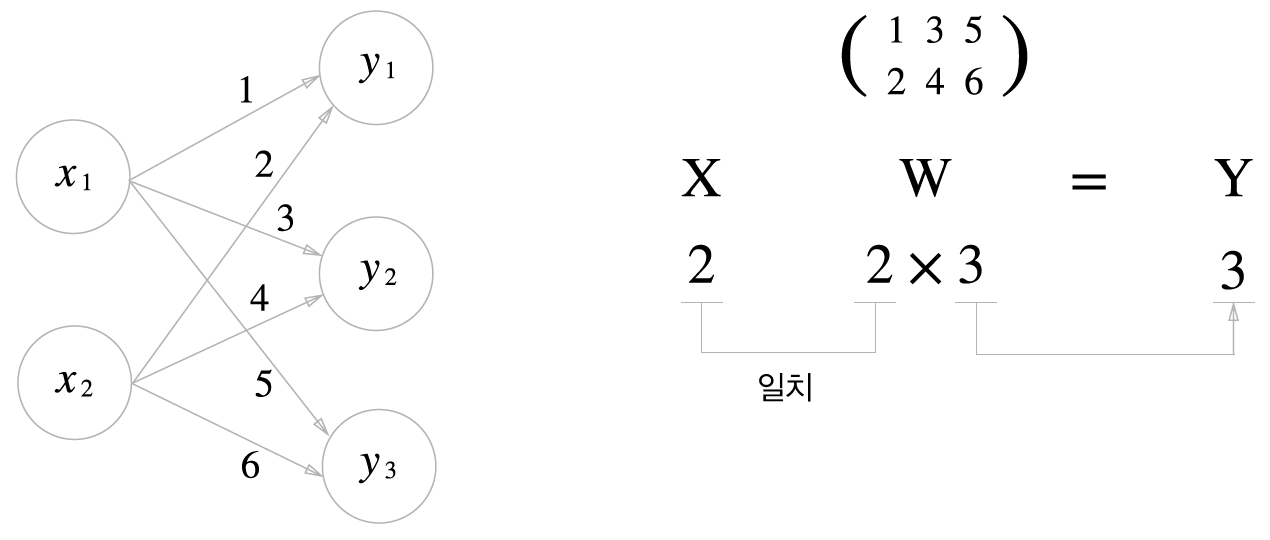

In [8]:
Image('./deep_learning_images/fig 3-14.png', width=400)

In [9]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(X.shape, W.shape, Y.shape)

(2,) (2, 3) (3,)


In [10]:
Image('./deep_learning_images/fig 3-17.png', width=400)

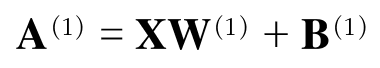

In [11]:
Image('./deep_learning_images/e 3.9.png', width=400)

In [12]:
X = np.array([1.0, 0.5]) # (2,)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # (2, 3)
B1 = np.array([0.1, 0.2, 0.3]) # (3,)

A1 = np.dot(X, W1) + B1
print(X.shape, W1.shape, B1.shape, A1.shape)

(2,) (2, 3) (3,) (3,)


In [28]:
Image('./deep_learning_images/fig 3-18.png', width=400)

In [13]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [14]:
Z1 = sigmoid(A1)

In [15]:
Z1 # (3,)

array([0.57444252, 0.66818777, 0.75026011])

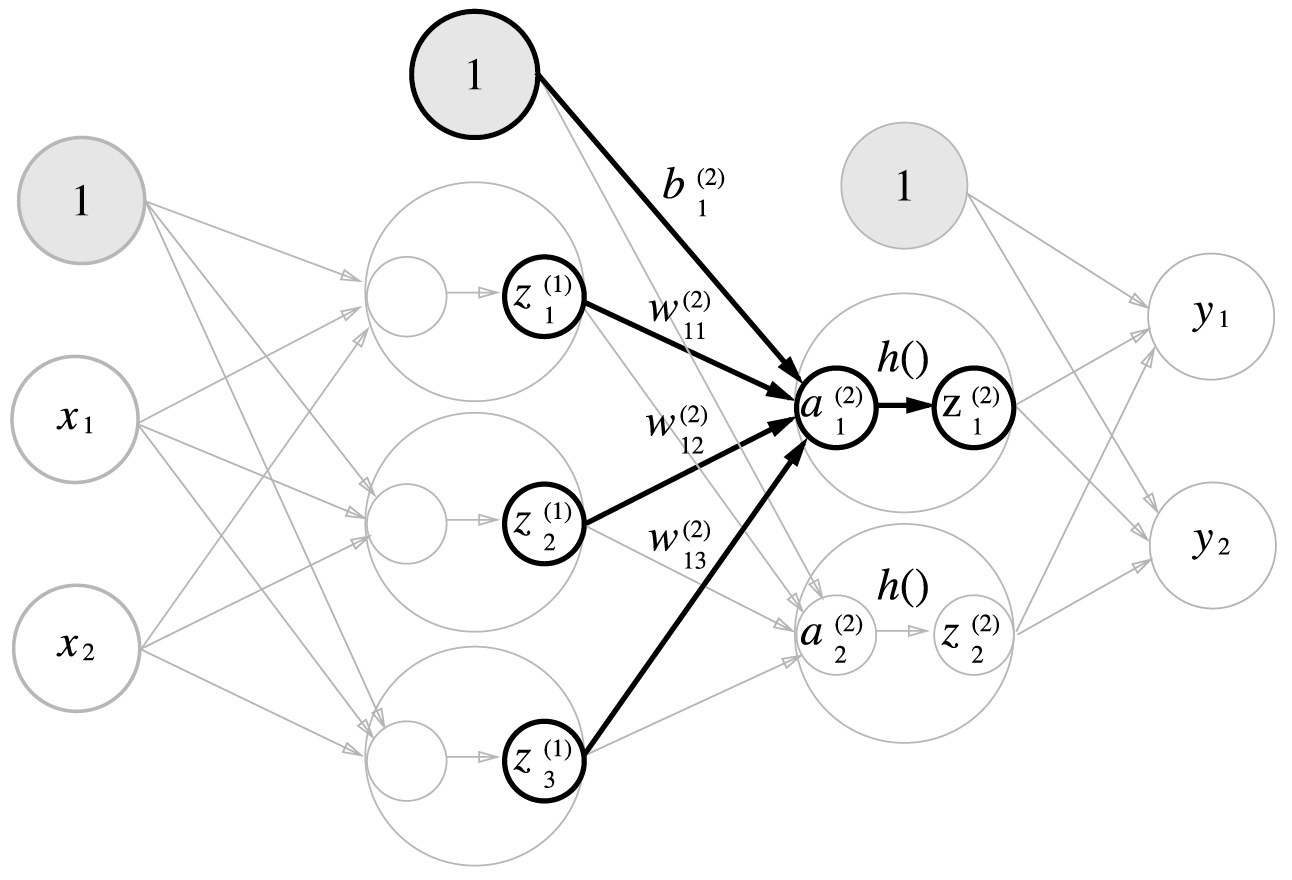

In [30]:
Image('./deep_learning_images/fig 3-19.png', width=400)

In [ ]:
# A2 = Z1W2 + B2  
# (2,) = (3,)(3,2) + (2,)

In [16]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # (3, 2)
B2 = np.array([0.1, 0.2]) # (2,)

A2 = np.dot(Z1, W2) + B2 # (2,)
Z2 = sigmoid(A2) # (2,)
print(W2.shape, B2.shape, A2.shape, Z2.shape )

(3, 2) (2,) (2,) (2,)


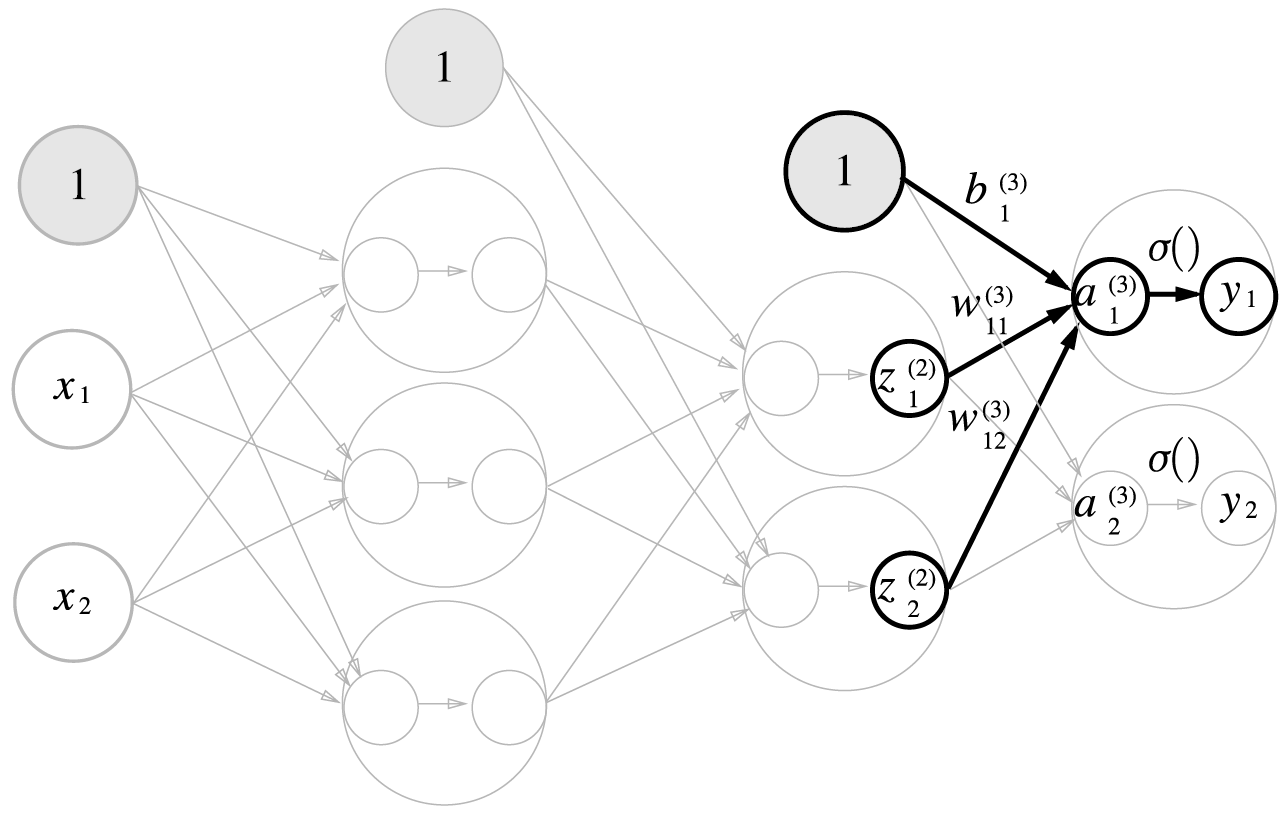

In [32]:
Image('./deep_learning_images/fig 3-20.png', width=400)

In [17]:
def identity_function(x): # 회귀 문제
    return x

In [18]:
# A3 = Z2W3 + B3
# (2,) = (2,)(2, 2) + (2,)

In [19]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # (2, 2)
B3 = np.array([0.1, 0.2]) # (2,)
A3 = np.dot(Z2, W3) + B3 # (2,)
Y = identity_function(A3) # (2,)
print(W3.shape, B3.shape, A3.shape, Y.shape)

(2, 2) (2,) (2,) (2,)


## 출력층(Softmax 함수)

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y

## 3층 신경망 구현

In [21]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # (2, 3)
    network['B1'] = np.array([0.1, 0.2, 0.3]) # (3,)
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # (3, 2)
    network['B2'] = np.array([0.1, 0.2]) # (2,)
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # (2, 2)
    network['B3'] = np.array([0.1, 0.2]) # (2,)
    
    return network

def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']    
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2 # (2,)
    Z2 = sigmoid(A2) # (2,)
    A3 = np.dot(Z2, W3) + B3 # (2,)
    Y = identity_function(A3) # (2,)
    
    return Y

In [22]:
network = init_network()
X = np.array([1.0, 0.5]) # (2,)
Y = forward(network, X)
Y

array([0.31682708, 0.69627909])

## 손글씨 숫자(MNIST)

In [28]:
from dataset.mnist import load_mnist

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return X_test, y_test

X_test, y_test = get_data()
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


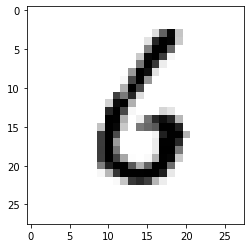

In [31]:
plt.imshow(X_test[50].reshape(28, 28), cmap='binary')

In [40]:
import pickle

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [41]:
network = init_network()
print(type(network), network.keys())

<class 'dict'> dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


In [37]:
network['W1'].shape, network['W2'].shape, network['W3'].shape

((784, 50), (50, 100), (100, 10))

In [38]:
network['b1'].shape, network['b2'].shape, network['b3'].shape

((50,), (100,), (10,))

- 입력 이미지 한장이 신경망을 통과하는 과정(전방향 연산, 예측)

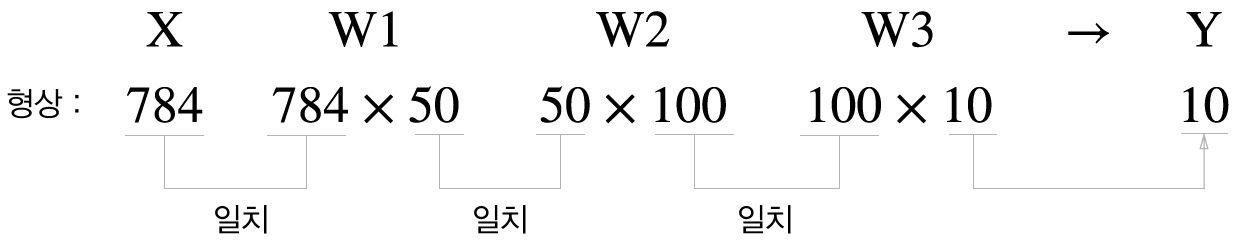

In [73]:
Image('./deep_learning_images/fig 3-26.png', width=400)

In [42]:
def predict(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']    
    
    A1 = np.dot(X, W1) + B1 # (50,)
    Z1 = sigmoid(A1)        # (50,)
    A2 = np.dot(Z1, W2) + B2  # (100,)
    Z2 = sigmoid(A2)          # (100,)
    A3 = np.dot(Z2, W3) + B3  # (10,)
    Y = softmax(A3)           # (10,)
    
    return Y

In [43]:
X_test[50].shape

(784,)

In [47]:
y = predict(network, X_test[50])
np.round(y, 3)

array([0.006, 0.   , 0.005, 0.   , 0.   , 0.005, 0.983, 0.   , 0.   ,
       0.   ], dtype=float32)

In [52]:
correct_cnt = 0
for i, test_img in enumerate(X_test): #10000 iterations
    prob = predict(network, test_img)
    pred = np.argmax(prob) 
    if pred == y_test[i]:
        correct_cnt +=1
accuracy = correct_cnt / len(y_test)
print('Accuracy : ', accuracy)           

Accuracy :  0.9352


- image 배치 입력에 대한 신경망 예측 과정

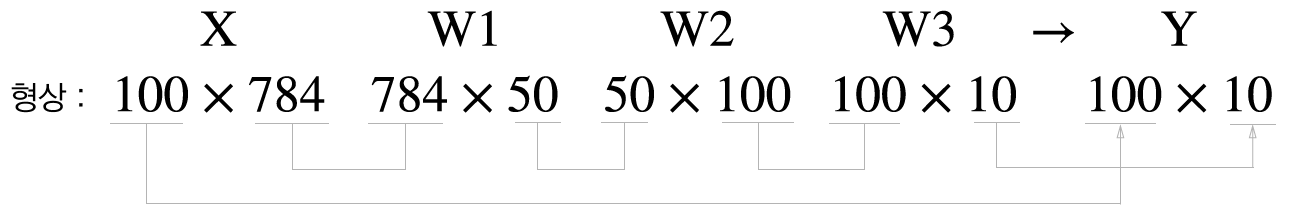

In [53]:
Image('./deep_learning_images/fig 3-27.png', width=400)

In [60]:
batch_size = 100
correct_cnt = 0
for i in range(0, len(X_test), batch_size): #10000 iterations
    test_img_batch = X_test[i:i+batch_size] # 100개씩 슬라이싱 (0~99, 100~199, .....)
    prob_batch = predict(network, test_img_batch)
    pred_batch = np.argmax(prob_batch, axis=1)
    correct_cnt += np.sum(pred_batch == y_test[i:i+batch_size])
    
accuracy = correct_cnt / len(y_test)
print('Accuracy : ', accuracy)  

Accuracy :  0.9352
